In [2]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_v9rqX0R.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
df.shape

(8523, 12)

In [7]:
data = df.copy()

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

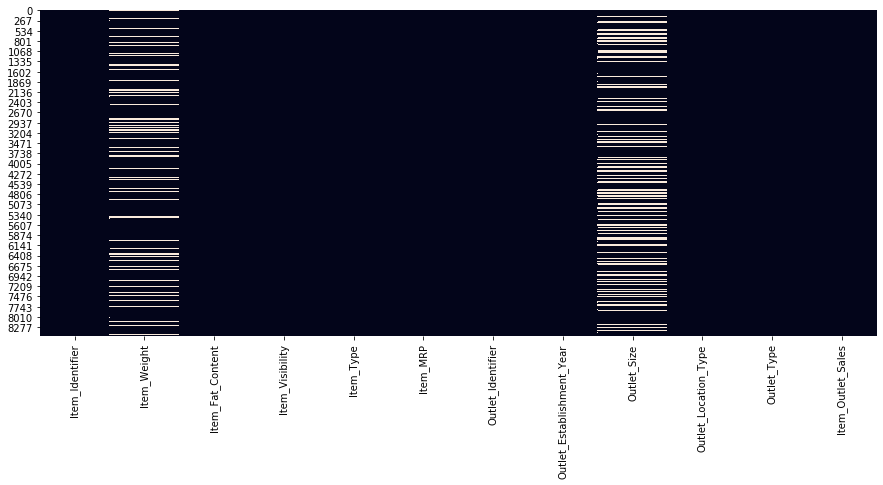

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isnull(),cbar=False)

### Nul Value Handling

1. Item_Weight and Outlet_Size having null values from the above plot

In [10]:
data['Outlet_Size'].isnull().sum()

2410

In [11]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

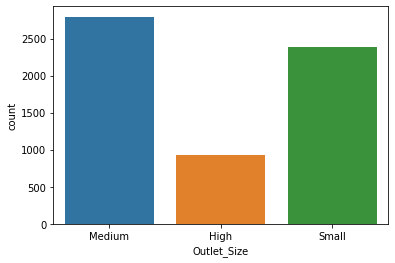

In [13]:
sns.countplot(data['Outlet_Size'])

In [14]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [15]:
data['Outlet_Size'].isnull().sum()

0

In [16]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

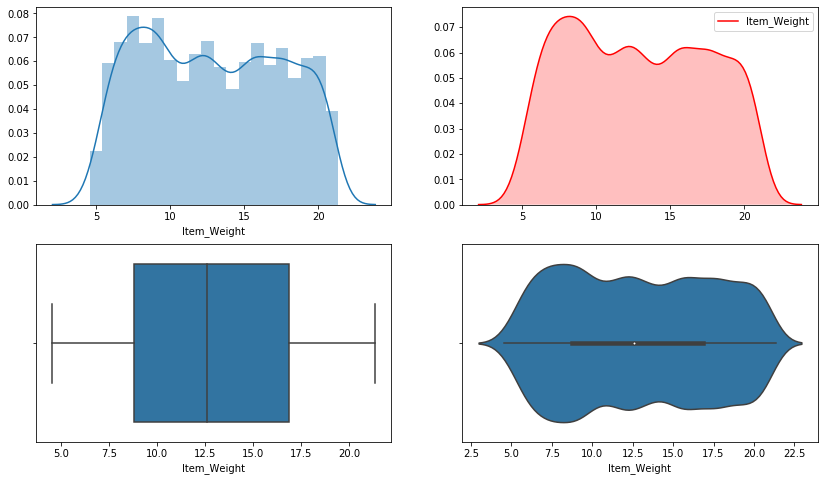

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(data['Item_Weight'])
plt.subplot(222)
sns.kdeplot(data['Item_Weight'],shade=True, color='Red')
plt.subplot(223)
sns.boxplot(data['Item_Weight'])
plt.subplot(224)
sns.violinplot(data['Item_Weight'])

In [19]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [20]:
data['Item_Weight'].isnull().sum()

0

In [21]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

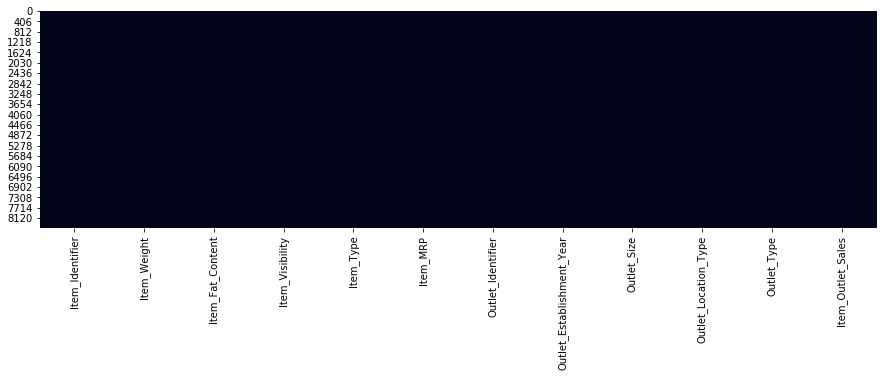

In [22]:
plt.figure(figsize=(15,4))
sns.heatmap(data.isnull(),cbar=False)

In [23]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
numcols,catcols=[],[]
for i in data.columns:
    if data[i].dtype != "O":
        numcols.append(i)
    else:
        catcols.append(i)
print("There are {} numerical columns and {} categorical columns available in data".format(len(numcols),len(catcols)))

There are 5 numerical columns and 7 categorical columns available in data


In [27]:
data_cat = data[catcols]

In [28]:
data_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [29]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [30]:
data['Item_Fat_Content'] = np.where((data['Item_Fat_Content'] == "Low Fat") | (data['Item_Fat_Content'] == "LF") | 
                                   (data['Item_Fat_Content'] == "low fat") , "low_fat", "regular")

In [31]:
data['Item_Fat_Content'].unique()

array(['low_fat', 'regular'], dtype=object)

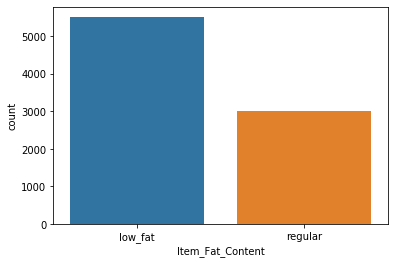

In [32]:
sns.countplot(data['Item_Fat_Content'])

In [33]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

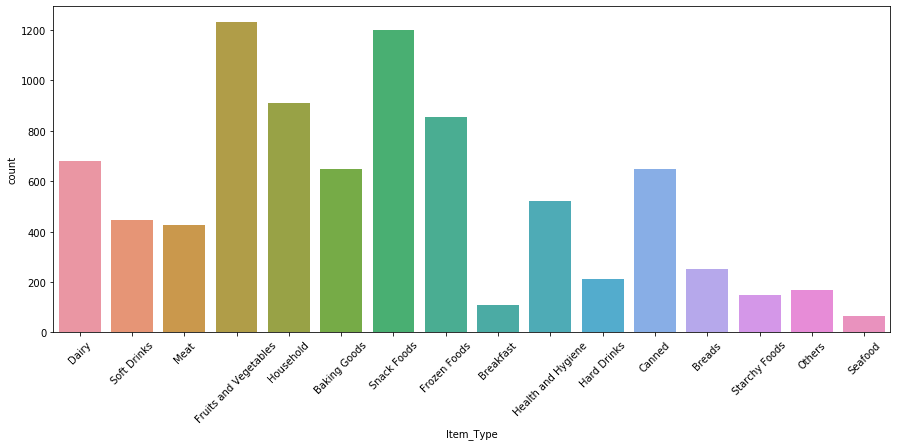

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(data['Item_Type'])
plt.xticks(rotation=45)

In [35]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

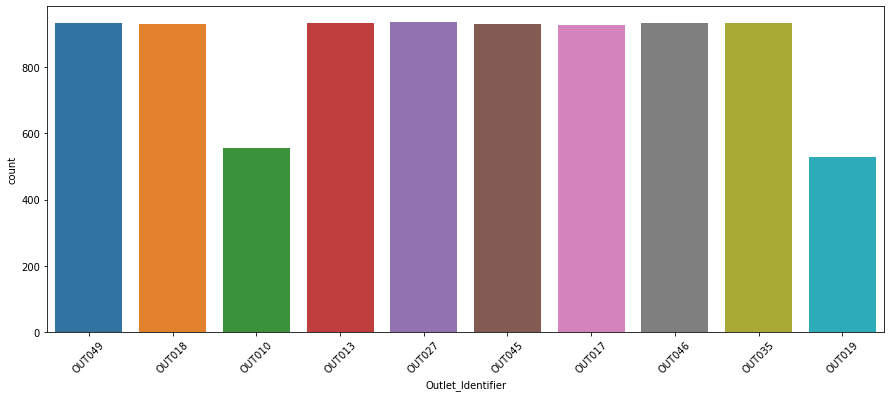

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(data['Outlet_Identifier'])
plt.xticks(rotation=45)

In [37]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [38]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

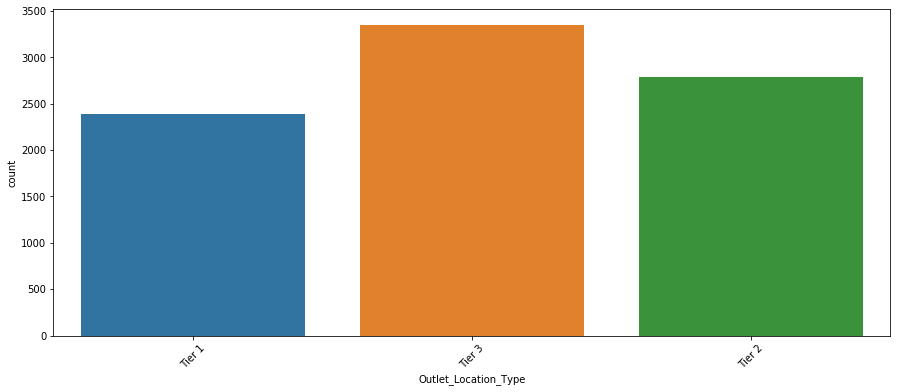

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(data['Outlet_Location_Type'])
plt.xticks(rotation=45)

In [40]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

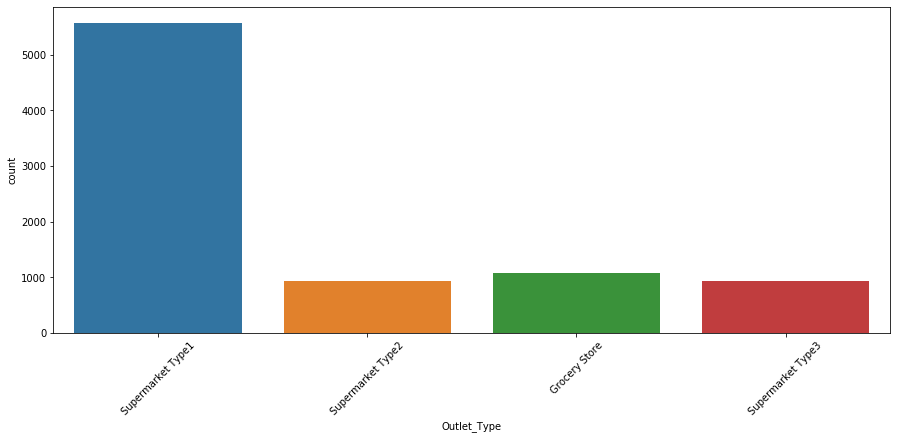

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(data['Outlet_Type'])
plt.xticks(rotation=45)

In [42]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
stackbar = pd.crosstab([data['Outlet_Size'],data['Outlet_Location_Type']],[data['Outlet_Type']])

In [44]:
stackbar.style.background_gradient(cmap="Oranges")

In [45]:
stackbar1 = pd.crosstab(data['Item_Type'],data['Item_Fat_Content'])

In [46]:
stackbar1

Item_Fat_Content,low_fat,regular
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


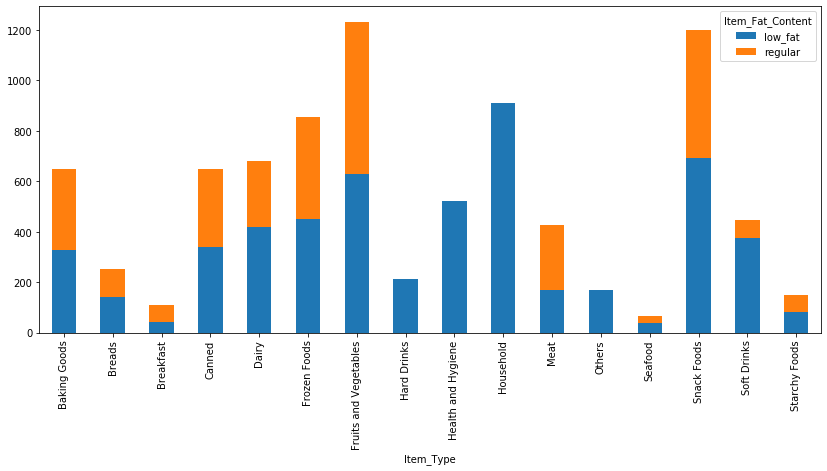

In [47]:
stackbar1.plot.bar(figsize=(14,6),stacked=True)

In [48]:
data['Item_Weight'],data['Item_Visibility']

(0        9.300
 1        5.920
 2       17.500
 3       19.200
 4        8.930
          ...  
 8518     6.865
 8519     8.380
 8520    10.600
 8521     7.210
 8522    14.800
 Name: Item_Weight, Length: 8523, dtype: float64,
 0       0.016047
 1       0.019278
 2       0.016760
 3       0.000000
 4       0.000000
           ...   
 8518    0.056783
 8519    0.046982
 8520    0.035186
 8521    0.145221
 8522    0.044878
 Name: Item_Visibility, Length: 8523, dtype: float64)

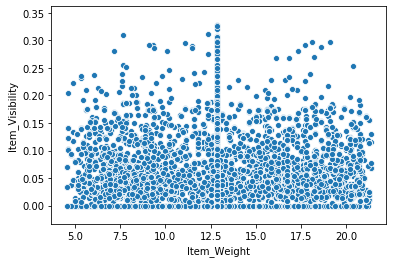

In [49]:
sns.scatterplot(data['Item_Weight'],data['Item_Visibility'])

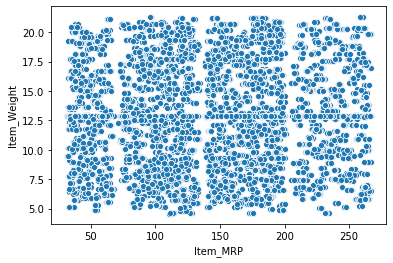

In [50]:
sns.scatterplot(data['Item_MRP'],data['Item_Weight'])

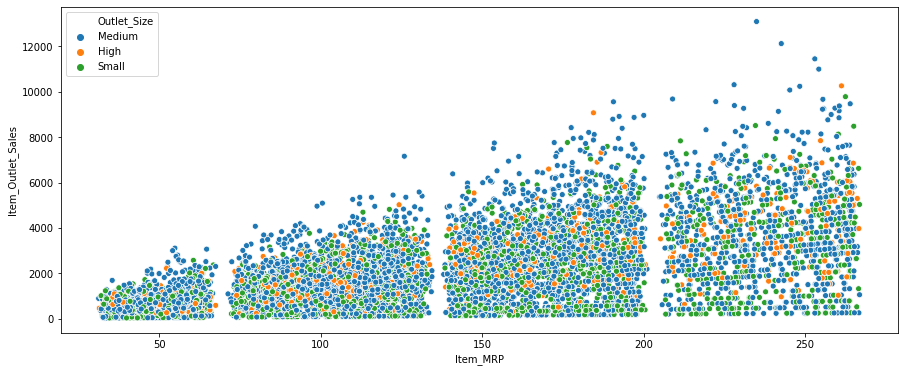

In [51]:
plt.figure(figsize=(15,6))

sns.scatterplot(data['Item_MRP'],data['Item_Outlet_Sales'],hue=data['Outlet_Size'])

In [52]:
(np.round(((data['Outlet_Size'].value_counts())/len(data))*100)).to_dict()

{'Medium': 61.0, 'Small': 28.0, 'High': 11.0}

In [53]:
def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

In [54]:
((data['Outlet_Size'].value_counts())/len(data))*100

Medium    61.046580
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64

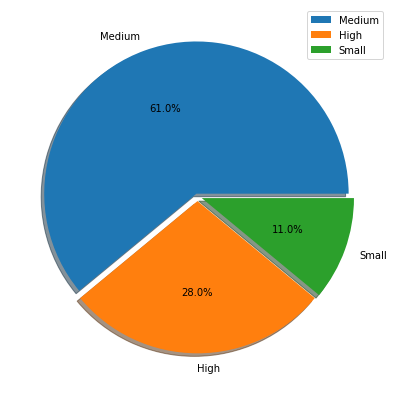

In [55]:
plt.figure(figsize=(10,7))
plt.pie((np.round(((data['Outlet_Size'].value_counts())/len(data))*100)),labels=data['Outlet_Size'].unique().tolist(),
        explode=[0.02, 0.03, 0.03],shadow=True,autopct='%1.1f%%')
plt.legend()
plt.show()

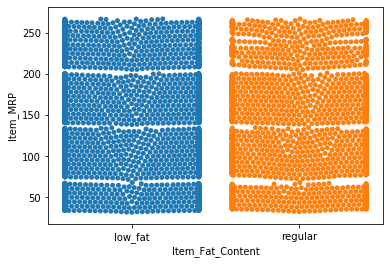

In [56]:
sns.swarmplot(x = data['Item_Fat_Content'],y = data['Item_MRP'],)

In [57]:
data['Item_MRP'].min()

31.29

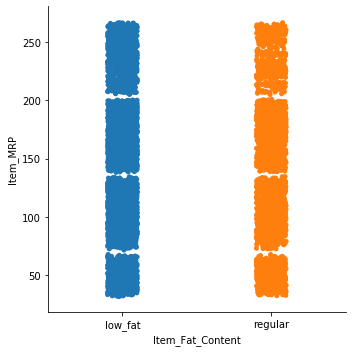

In [58]:
sns.catplot(x="Item_Fat_Content", y="Item_MRP", data=data)

In [59]:
stackbar2 = pd.crosstab(data['Outlet_Type'],data['Outlet_Identifier'])

In [60]:
stackbar2

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,,,,,,,,,,
Grocery Store,555,0,0,0,528,0,0,0,0,0
Supermarket Type1,0,932,926,0,0,0,930,929,930,930
Supermarket Type2,0,0,0,928,0,0,0,0,0,0
Supermarket Type3,0,0,0,0,0,935,0,0,0,0


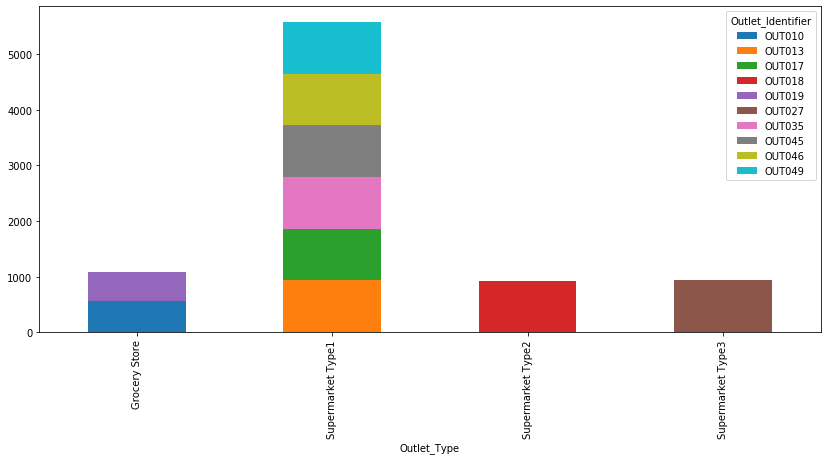

In [61]:
stackbar2.plot.bar(figsize=(14,6),stacked=True)

In [ ]:
len((np.where(df['Item_MRP']>100)[0]))

## df.corr()

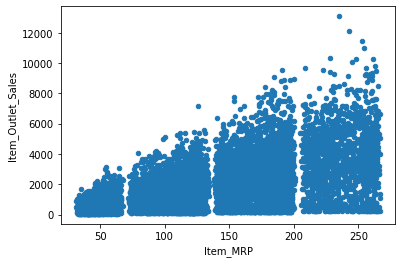

In [64]:
df.plot.scatter(x="Item_MRP",y="Item_Outlet_Sales")

In [71]:
len(data_cat['Item_Identifier'].unique())

1559

In [73]:
data_cat['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDF56     9
FDW26     9
FDW49     9
         ..
FDE52     1
FDN52     1
FDO33     1
FDQ60     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [74]:
data_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [76]:
data['Item_Fat_Content'].unique()

array(['low_fat', 'regular'], dtype=object)

In [81]:
data['Item_Fat_Content_values'] = np.nan
for i in range(len(data['Item_Fat_Content'])):
    if data['Item_Fat_Content'][i] == "low_fat":
        data['Item_Fat_Content_values'] = 0
    else:
        data['Item_Fat_Content_values'] =1


In [83]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [84]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_values'],
      dtype='object')

In [123]:
data['Outlet_Location_Type'] =df['Outlet_Location_Type']

In [89]:
Item_Type_mean = data.groupby(data['Item_Type'])['Item_Outlet_Sales'].mean().to_dict()

In [90]:
data['Item_Type_mean'] = data['Item_Type'].map(Item_Type_mean)

In [91]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_values',
       'Item_Type_mean'],
      dtype='object')

In [94]:
data_cat['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [95]:
Outlet_Size = {'High':1,'Medium':2,'Small':3}

In [96]:
data['Outlet_Size_map'] = data['Outlet_Size'].map(Outlet_Size)

In [97]:
data['Outlet_Size_map']

0       2
1       2
2       2
3       2
4       1
       ..
8518    1
8519    2
8520    3
8521    2
8522    3
Name: Outlet_Size_map, Length: 8523, dtype: int64

In [124]:
for i in range(len(data)):
    data['Outlet_Location_Type'][i] = data['Outlet_Location_Type'][i].split(' ')[1]

In [126]:
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].astype(int)

In [127]:
data['Outlet_Location_Type'].dtype

dtype('int32')

In [129]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380,0,2232.542597,2
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228,0,2006.511735,2
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700,0,2158.977911,2
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,3,Grocery Store,732.3800,0,2289.009592,2
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052,0,2258.784300,1


In [130]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [133]:
data['Item_Identifier'].unique().tolist()

['FDA15',
 'DRC01',
 'FDN15',
 'FDX07',
 'NCD19',
 'FDP36',
 'FDO10',
 'FDP10',
 'FDH17',
 'FDU28',
 'FDY07',
 'FDA03',
 'FDX32',
 'FDS46',
 'FDF32',
 'FDP49',
 'NCB42',
 'DRI11',
 'FDU02',
 'FDN22',
 'FDW12',
 'NCB30',
 'FDC37',
 'FDR28',
 'NCD06',
 'FDV10',
 'DRJ59',
 'FDE51',
 'FDC14',
 'FDV38',
 'NCS17',
 'FDP33',
 'FDO23',
 'DRH01',
 'NCX29',
 'FDV20',
 'DRZ11',
 'FDX10',
 'FDB34',
 'FDK43',
 'FDA46',
 'FDC02',
 'FDL50',
 'FDM39',
 'NCP05',
 'FDV49',
 'FDL12',
 'FDS02',
 'NCL17',
 'FDM40',
 'FDR13',
 'FDA43',
 'NCP18',
 'FDK21',
 'NCX54',
 'DRK35',
 'FDY21',
 'FDI26',
 'FDM20',
 'FDV27',
 'FDF09',
 'FDY40',
 'FDY45',
 'FDC46',
 'FDH19',
 'FDZ03',
 'DRH37',
 'NCI17',
 'FDJ58',
 'FDH35',
 'FDG02',
 'NCZ18',
 'FDC29',
 'FDQ10',
 'FDN48',
 'FDL04',
 'FDV25',
 'FDD58',
 'FDN04',
 'FDV45',
 'NCL18',
 'FDR12',
 'FDG20',
 'FDZ55',
 'FDQ49',
 'FDN33',
 'FDN27',
 'FDW20',
 'DRG27',
 'DRI25',
 'FDA44',
 'NCR17',
 'FDU04',
 'FDF41',
 'FDB56',
 'FDT28',
 'FDD10',
 'FDW57',
 'DRB48',
 'FDP09',


In [141]:
data['Item_Identifier_1'] = np.nan
data['Item_Identifier_2'] = np.nan
data['Item_Identifier_3'] = np.nan
data['Item_Identifier_4'] = np.nan
for i in range(len(data['Item_Identifier'])):
    data['Item_Identifier_1'][i] = data['Item_Identifier'][i][0]
    data['Item_Identifier_2'][i] = data['Item_Identifier'][i][1]
    data['Item_Identifier_3'][i] = data['Item_Identifier'][i][2]
    data['Item_Identifier_4'][i] = data['Item_Identifier'][i][3:]

In [150]:
for i in range(len(data['Item_Identifier'])):
    data['Item_Identifier_1'][i] = string.ascii_uppercase.index(data['Item_Identifier_1'][i])
    data['Item_Identifier_2'][i] = string.ascii_uppercase.index(data['Item_Identifier_2'][i])
    data['Item_Identifier_3'][i] = string.ascii_uppercase.index(data['Item_Identifier_3'][i])
    #data['Item_Identifier_4'][i] = string.ascii_uppercase.index(data['Item_Identifier_1'][i])

In [151]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,1,Supermarket Type1,3735.1380,0,2232.542597,2,5,3,0,15.0
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,3,Supermarket Type2,443.4228,0,2006.511735,2,3,17,2,1.0
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,1,Supermarket Type1,2097.2700,0,2158.977911,2,5,3,13,15.0
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,3,Grocery Store,732.3800,0,2289.009592,2,5,3,23,7.0
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,OUT013,1987,High,3,Supermarket Type1,994.7052,0,2258.784300,1,13,2,3,19.0


In [154]:
for i in range(len(data)):
    data['Outlet_Identifier'][i] = data['Outlet_Identifier'][i][3:]

In [158]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [159]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Outlet_Type']= label_encoder.fit_transform(data['Outlet_Type'])
 
data['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [161]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,049,1999,Medium,1,1,3735.1380,0,2232.542597,2,5,3,0,15.0
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,018,2009,Medium,3,2,443.4228,0,2006.511735,2,3,17,2,1.0
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,049,1999,Medium,1,1,2097.2700,0,2158.977911,2,5,3,13,15.0
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,010,1998,Medium,3,0,732.3800,0,2289.009592,2,5,3,23,7.0
4,NCD19,8.93,low_fat,0.000000,Household,53.8614,013,1987,High,3,1,994.7052,0,2258.784300,1,13,2,3,19.0


In [170]:
data.columns.to_list()

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Item_Fat_Content_values',
 'Item_Type_mean',
 'Outlet_Size_map',
 'Item_Identifier_1',
 'Item_Identifier_2',
 'Item_Identifier_3',
 'Item_Identifier_4']

In [167]:
data = data.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size'],axis = 1)

In [168]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4
0,9.300,0.016047,249.8092,049,1999,1,1,3735.1380,0,2232.542597,2,5,3,0,15.0
1,5.920,0.019278,48.2692,018,2009,3,2,443.4228,0,2006.511735,2,3,17,2,1.0
2,17.500,0.016760,141.6180,049,1999,1,1,2097.2700,0,2158.977911,2,5,3,13,15.0
3,19.200,0.000000,182.0950,010,1998,3,0,732.3800,0,2289.009592,2,5,3,23,7.0
4,8.930,0.000000,53.8614,013,1987,3,1,994.7052,0,2258.784300,1,13,2,3,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,013,1987,3,1,2778.3834,0,2277.321739,1,5,3,5,22.0
8519,8.380,0.046982,108.1570,045,2002,2,1,549.2850,0,1952.971207,2,5,3,18,36.0
8520,10.600,0.035186,85.1224,035,2004,2,1,1193.1136,0,2010.000265,3,13,2,9,29.0
8521,7.210,0.145221,103.1332,018,2009,3,2,1845.5976,0,2277.321739,2,5,3,13,46.0


In [171]:
data = data[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Fat_Content_values',
 'Item_Type_mean',
 'Outlet_Size_map',
 'Item_Identifier_1',
 'Item_Identifier_2',
 'Item_Identifier_3',
 'Item_Identifier_4',
'Item_Outlet_Sales']]

In [172]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Outlet_Sales
0,9.30,0.016047,249.8092,049,1999,1,1,0,2232.542597,2,5,3,0,15.0,3735.1380
1,5.92,0.019278,48.2692,018,2009,3,2,0,2006.511735,2,3,17,2,1.0,443.4228
2,17.50,0.016760,141.6180,049,1999,1,1,0,2158.977911,2,5,3,13,15.0,2097.2700
3,19.20,0.000000,182.0950,010,1998,3,0,0,2289.009592,2,5,3,23,7.0,732.3800
4,8.93,0.000000,53.8614,013,1987,3,1,0,2258.784300,1,13,2,3,19.0,994.7052


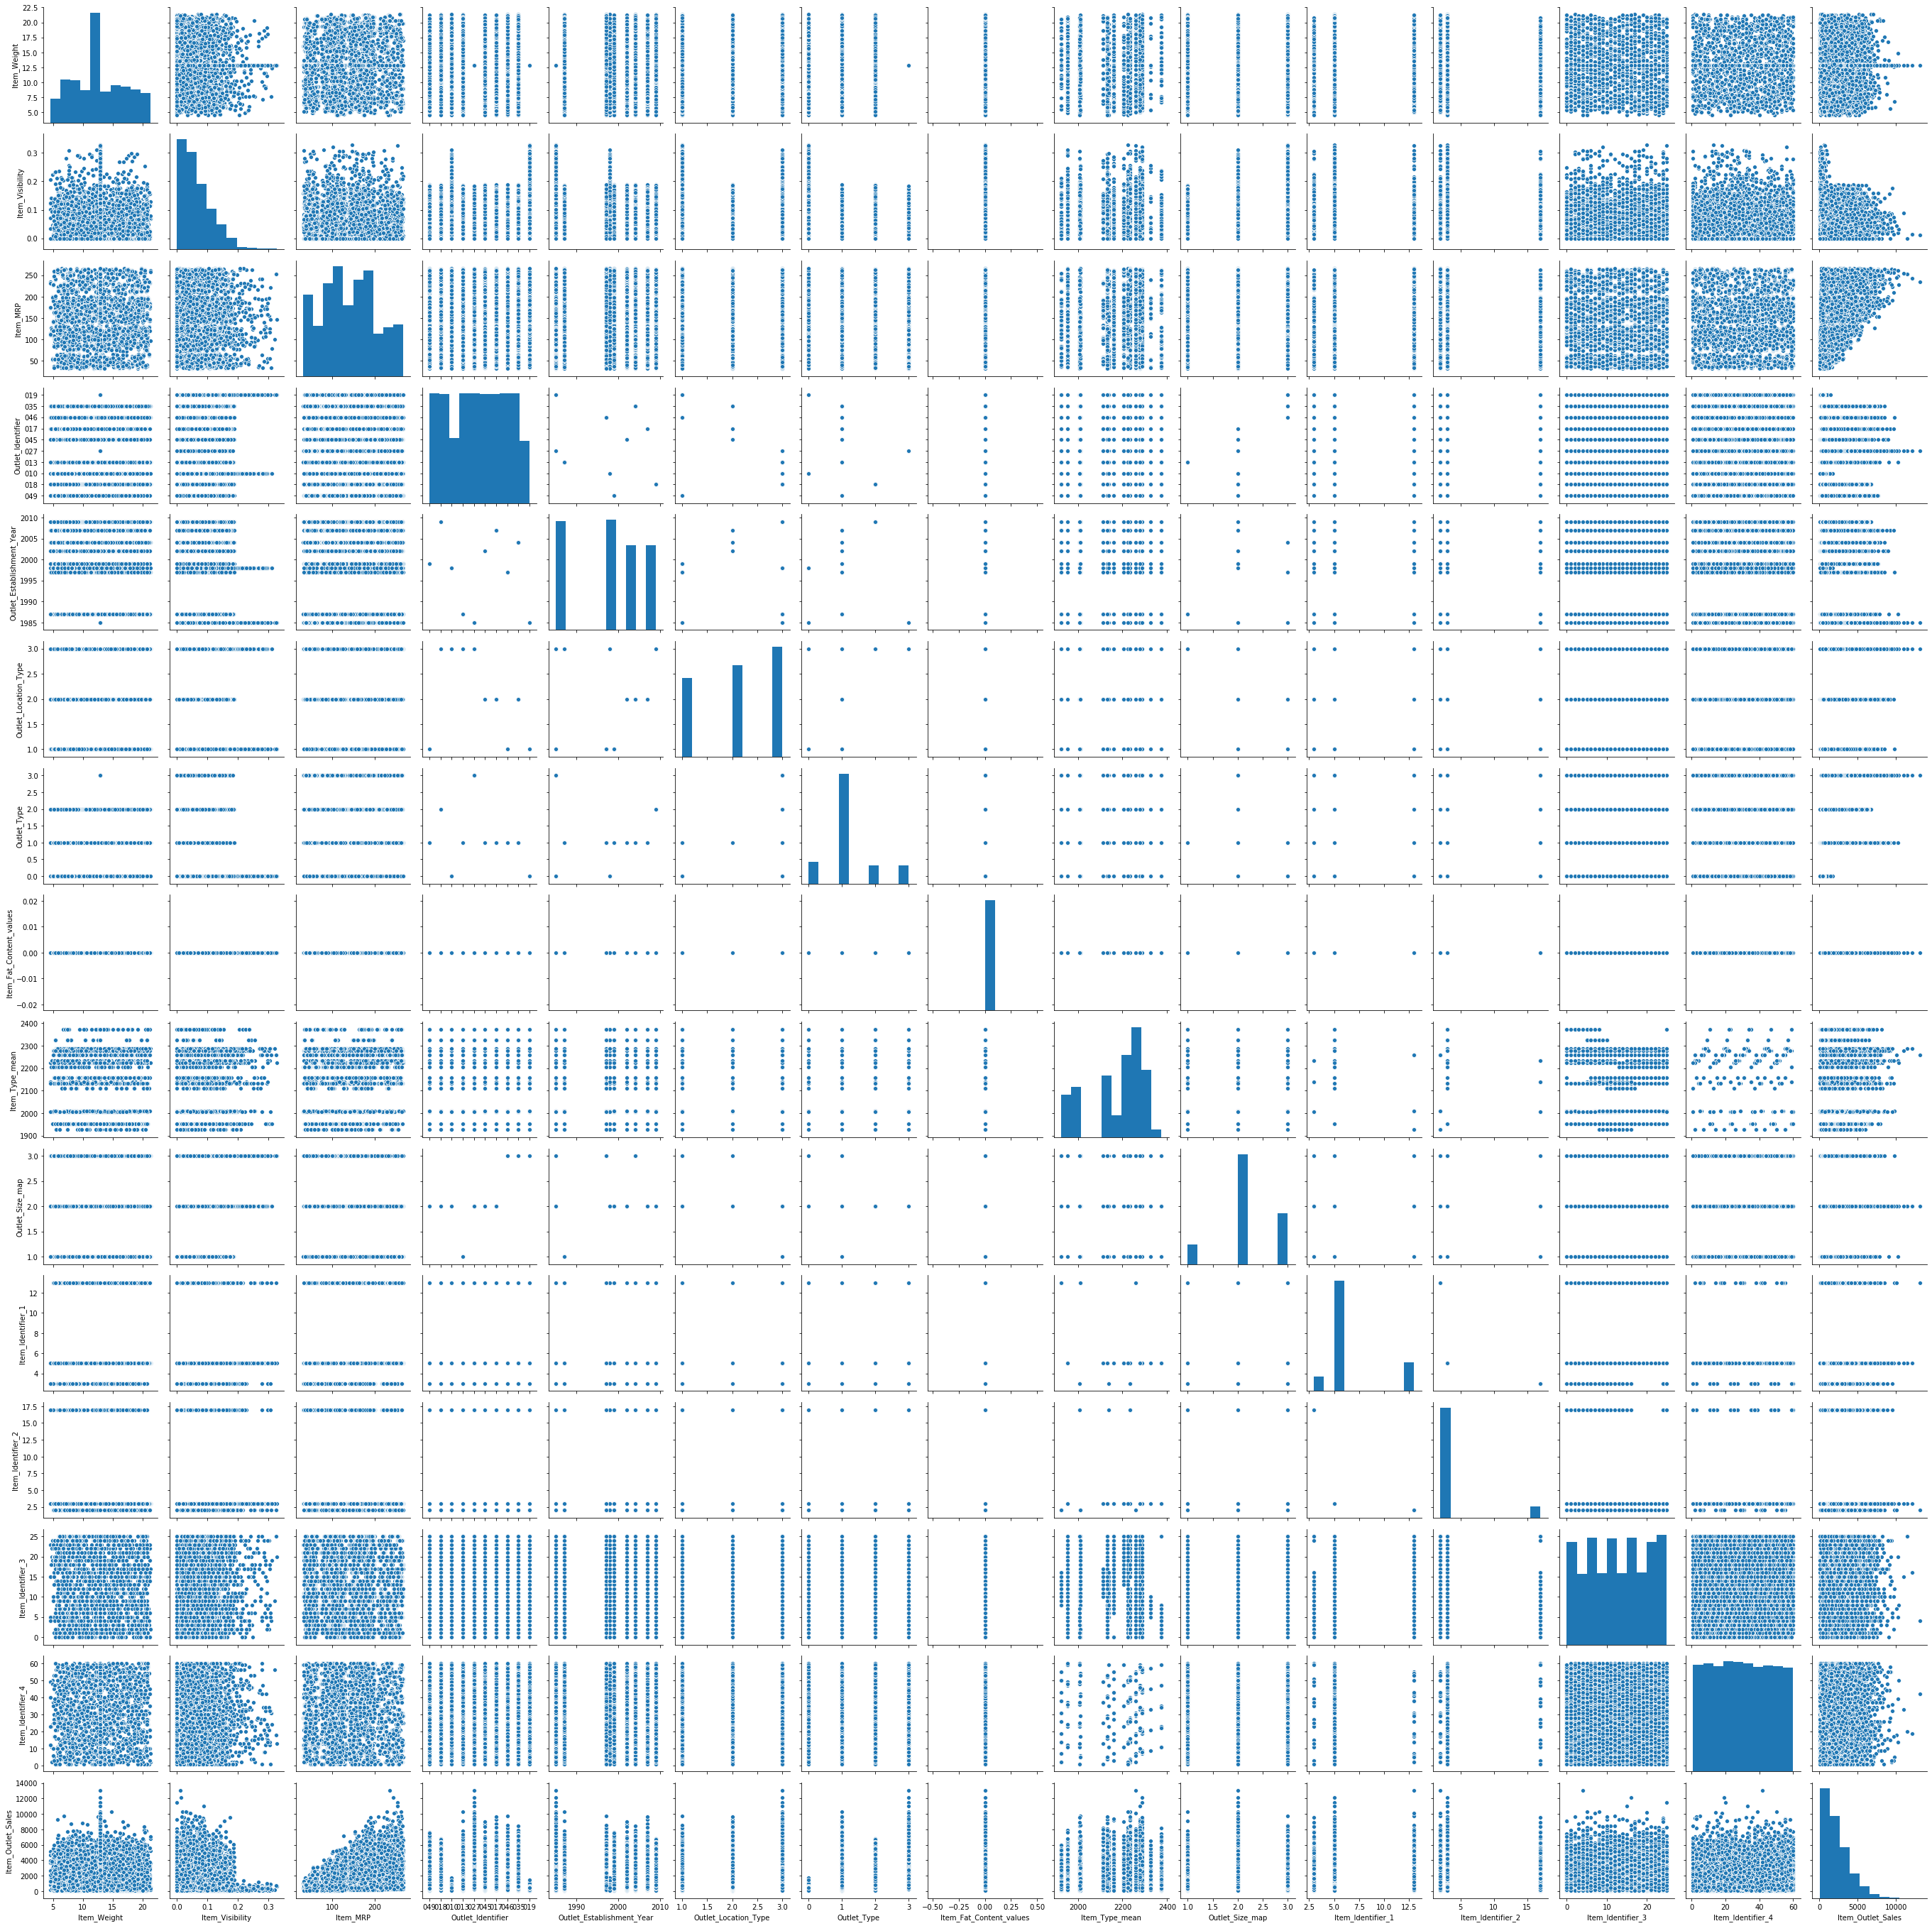

In [173]:
sns.pairplot(data)

In [13]:
X = data.drop(columns = 'Item_Outlet_Sales')
y = data['Item_Outlet_Sales']

In [16]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state = 424)

In [177]:
print(X_test.shape)
print(Y_test.shape)

(2557, 14)
(2557,)


In [181]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
y_pred  =  LR.predict(X_test)
y_pred

array([2255.23518633, 3583.66415484, 2339.02227537, ..., -717.73540872,
       2547.25983787, 1520.12176196])

In [185]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print('r2 socre is',score)

r2 socre is 0.5157881972099909


In [186]:
from sklearn.ensemble import RandomForestRegressor
FR = RandomForestRegressor()
FR.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
y_pred  =  FR.predict(X_test)
y_pred

array([2856.41516 , 3756.1107  , 2176.353724, ...,   78.784114,
       2396.953238,  987.894066])

In [188]:
sc = r2_score(Y_test,y_pred)
print(sc)

0.5519341614215117


In [199]:
FR.feature_importances_.tolist()

[0.04081370223237839,
 0.08120145056223932,
 0.42056581004277754,
 0.018576958760119732,
 0.047475710423287666,
 0.007068108200993977,
 0.24532976617875696,
 0.0,
 0.030957514127181868,
 0.008335956614926426,
 0.004880350664816168,
 0.004715599945561552,
 0.04302843749531712,
 0.04705063475164313]

In [195]:
Feat_Imp

[0.04081370223237839,
 0.08120145056223932,
 0.42056581004277754,
 0.018576958760119732,
 0.047475710423287666,
 0.007068108200993977,
 0.24532976617875696,
 0.0,
 0.030957514127181868,
 0.008335956614926426,
 0.004880350664816168,
 0.004715599945561552,
 0.04302843749531712,
 0.04705063475164313]

In [197]:
x_list = X.columns

<BarContainer object of 14 artists>

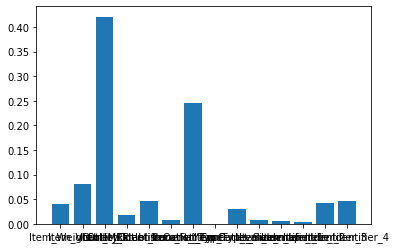

In [198]:
plt.bar(x_list,Feat_Imp)

In [221]:
feat_df = pd.DataFrame(Feat_Imp,x_list,columns = ['Value'])

In [222]:
feat_df

,Value
Item_Weight,0.040814
Item_Visibility,0.081201
Item_MRP,0.420566
Outlet_Identifier,0.018577
Outlet_Establishment_Year,0.047476
Outlet_Location_Type,0.007068
Outlet_Type,0.245330
Item_Fat_Content_values,0.000000
Item_Type_mean,0.030958
Outlet_Size_map,0.008336


In [207]:
Feat_df.sort_index().nlargest()

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [229]:
feat_df.nlargest(10,'Value')

,Value
Item_MRP,0.420566
Outlet_Type,0.245330
Item_Visibility,0.081201
Outlet_Establishment_Year,0.047476
Item_Identifier_4,0.047051
Item_Identifier_3,0.043028
Item_Weight,0.040814
Item_Type_mean,0.030958
Outlet_Identifier,0.018577
Outlet_Size_map,0.008336


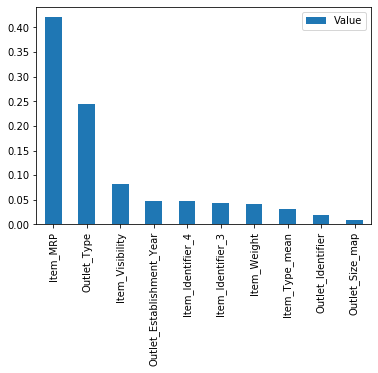

In [235]:
feat_df.nlargest(10,'Value').plot(kind='bar')

In [237]:
from sklearn.ensemble import GradientBoostingRegressor

In [238]:
gbtr = GradientBoostingRegressor()
gbtr.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [239]:
y_pred  =  gbtr.predict(X_test)
y_pred

array([2762.68468864, 3772.42387702, 2154.4938324 , ...,  130.60167145,
       3076.14873129, 1446.66775766])

In [240]:
sc1 = r2_score(Y_test,y_pred)

In [241]:
sc1

0.6066209937321512

In [128]:
data = pd.read_csv('data.csv')

In [129]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Fat_Content_values', 'Item_Type_mean', 'Outlet_Size_map',
       'Item_Identifier_1', 'Item_Identifier_2', 'Item_Identifier_3',
       'Item_Identifier_4', 'Item_Outlet_Sales'],
      dtype='object')

In [130]:
X =  data.drop('Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state = 424)

In [132]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
y_pred  =  LR.predict(X_test)
y_pred

array([2255.23518633, 3583.66415484, 2339.02227537, ..., -717.73540872,
       2547.25983787, 1520.12176196])

In [134]:
from sklearn.metrics import r2_score
sc2 = r2_score(Y_test,y_pred)
sc2

0.5157881972099909

In [135]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(X_train,Y_train)
y_pred_rf = RF.predict(X_test)
score_rf = r2_score(y_pred_rf,Y_test)
print(score_rf)

0.2971753657101336


In [136]:
from sklearn.ensemble import GradientBoostingRegressor
GBT = GradientBoostingRegressor().fit(X_train,Y_train)
y_pred_gbt = GBT.predict(X_test)
score_gbt = r2_score(y_pred_gbt,Y_test)
print(score_gbt)

0.3266796296042137


In [137]:
data.head(7)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Outlet_Sales
0,9.300,0.016047,249.8092,49,1999,1,1,0,2232.542597,2,5,3,0,15.0,3735.1380
1,5.920,0.019278,48.2692,18,2009,3,2,0,2006.511735,2,3,17,2,1.0,443.4228
2,17.500,0.016760,141.6180,49,1999,1,1,0,2158.977911,2,5,3,13,15.0,2097.2700
3,19.200,0.000000,182.0950,10,1998,3,0,0,2289.009592,2,5,3,23,7.0,732.3800
4,8.930,0.000000,53.8614,13,1987,3,1,0,2258.784300,1,13,2,3,19.0,994.7052
5,10.395,0.000000,51.4008,18,2009,3,2,0,1952.971207,2,5,3,15,36.0,556.6088
6,13.650,0.012741,57.6588,13,1987,3,1,0,2277.321739,1,5,3,14,10.0,343.5528


In [138]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Fat_Content_values', 'Item_Type_mean', 'Outlet_Size_map',
       'Item_Identifier_1', 'Item_Identifier_2', 'Item_Identifier_3',
       'Item_Identifier_4', 'Item_Outlet_Sales'],
      dtype='object')

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.04683841, 0.04683841, 0.04683841, ..., 0.21953897, 0.21953897,
         0.21953897])),
 (0.032791351820078, 0.08843261666377278, 0.9362472610231777))

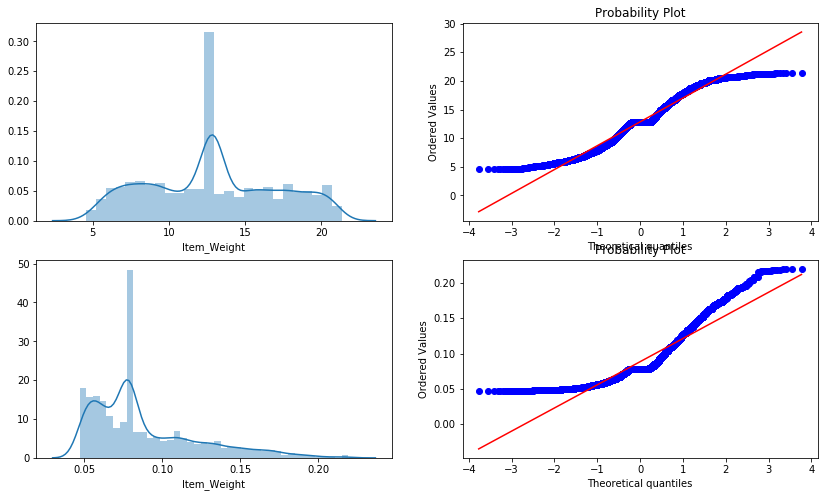

In [166]:
import scipy.stats 
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(data['Item_Weight'])
plt.subplot(222)
scipy.stats.probplot(data['Item_Weight'],plot=plt)
plt.subplot(223)
sns.distplot(1/(data['Item_Weight']))
plt.subplot(224)
scipy.stats.probplot(1/(data['Item_Weight']),plot=plt)


((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.56667011, 0.57077211,
         0.57305405])),
 (0.10658639565549707, 0.2337091285351814, 0.9929915158221725))

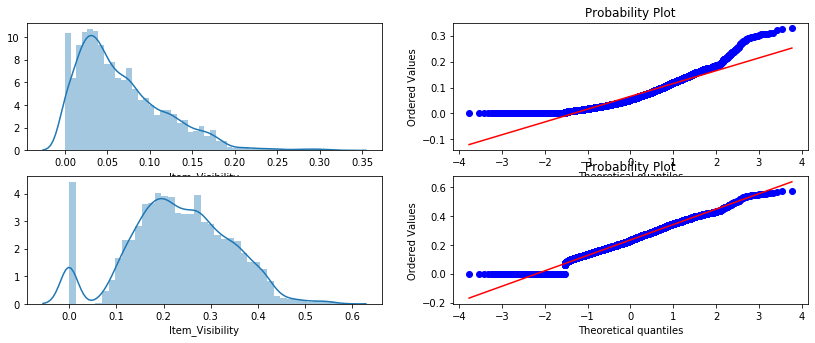

In [152]:
plt.figure(figsize=(14,8))
plt.subplot(321)
sns.distplot(data['Item_Visibility'])
plt.subplot(322)
scipy.stats.probplot(data['Item_Visibility'],plot=plt)
plt.subplot(323)
sns.distplot(np.sqrt(data['Item_Visibility']))
plt.subplot(324)
scipy.stats.probplot(np.sqrt(data['Item_Visibility']),plot=plt)


In [154]:
data_copy['Item_Visibility'] = (np.sqrt(data['Item_Visibility']))

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.00374688, 0.00374688, 0.00374969, ..., 0.03135779, 0.03175611,
         0.03195909])),
 (0.005257871631731882, 0.009334645846017899, 0.8876985038904817))

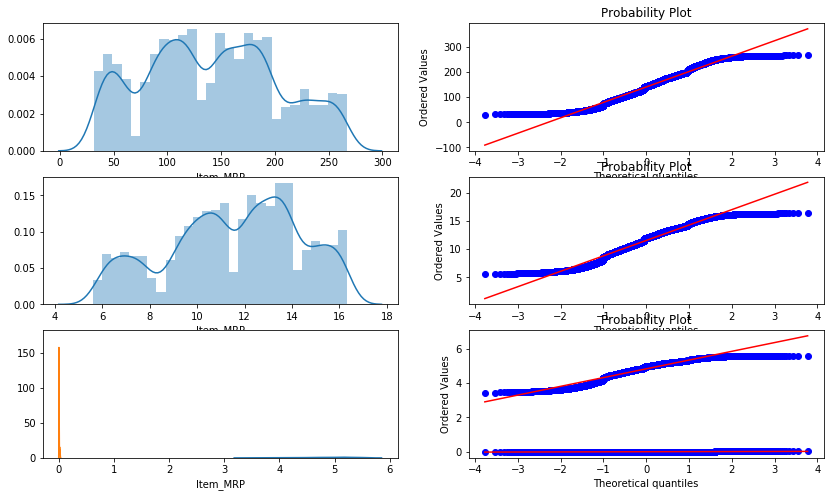

In [159]:
plt.figure(figsize=(14,8))
plt.subplot(321)
sns.distplot(data['Item_MRP'])
plt.subplot(322)
scipy.stats.probplot(data['Item_MRP'],plot=plt)
plt.subplot(323)
sns.distplot(np.sqrt(data['Item_MRP']))
plt.subplot(324)
scipy.stats.probplot(np.sqrt(data['Item_MRP']),plot=plt)
plt.subplot(325)
sns.distplot(np.log(data['Item_MRP']))
plt.subplot(326)
scipy.stats.probplot(np.log(data['Item_MRP']),plot=plt)
plt.subplot(325)
sns.distplot(1/(data['Item_MRP']))
plt.subplot(326)
scipy.stats.probplot(1/(data['Item_MRP']),plot=plt)

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.00042117, 0.00042117, 0.00042117, ..., 0.00051917, 0.00051917,
         0.00051917])),
 (2.3829306813388902e-05, 0.0004598424606092502, 0.9166504683012491))

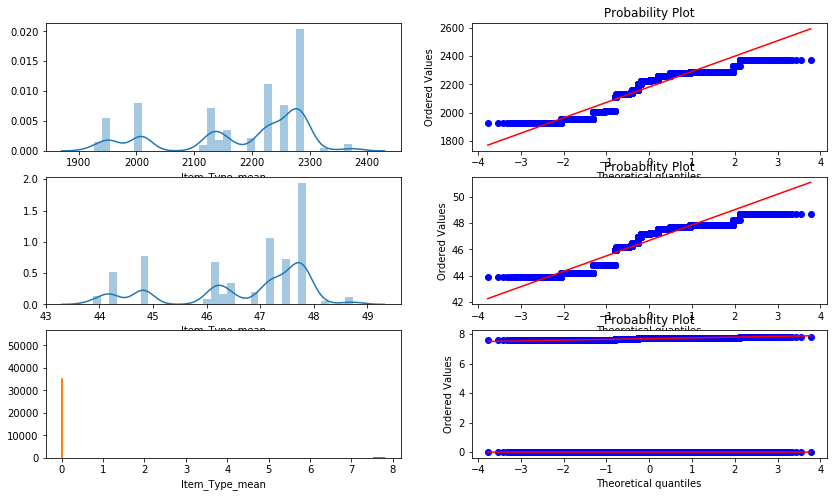

In [162]:
plt.figure(figsize=(14,8))
plt.subplot(321)
sns.distplot(data['Item_Type_mean'])
plt.subplot(322)
scipy.stats.probplot(data['Item_Type_mean'],plot=plt)
plt.subplot(323)
sns.distplot(np.sqrt(data['Item_Type_mean']))
plt.subplot(324)
scipy.stats.probplot(np.sqrt(data['Item_Type_mean']),plot=plt)
plt.subplot(325)
sns.distplot(np.log(data['Item_Type_mean']))
plt.subplot(326)
scipy.stats.probplot(np.log(data['Item_Type_mean']),plot=plt)
plt.subplot(325)
sns.distplot(1/(data['Item_Type_mean']))
plt.subplot(326)
scipy.stats.probplot(1/(data['Item_Type_mean']),plot=plt)

In [170]:
X = data_copy.drop(columns = ['Item_Outlet_Sales'])
y = data_copy['Item_Outlet_Sales']

In [171]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3,random_state=424)

In [172]:
y_pred = LR.predict(X_test)

In [173]:
print(r2_score(Y_test,y_pred))

0.5059642572297838


In [174]:
data_copy.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_values,Item_Type_mean,Outlet_Size_map,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Outlet_Sales
Item_Weight,1.000000,-0.007262,0.024756,-0.009177,-0.008301,0.004088,-0.000566,NaN,0.045321,-0.007225,0.053846,-0.053941,-0.009478,0.022994,0.011550
Item_Visibility,-0.007262,1.000000,0.004480,-0.086988,-0.055997,-0.022361,-0.138373,NaN,0.022007,0.054443,-0.055342,-0.015281,0.013340,-0.026312,-0.101234
Item_MRP,0.024756,0.004480,1.000000,0.004061,0.005020,0.000232,-0.001975,NaN,0.102678,0.006059,0.013887,-0.051216,-0.002401,-0.022876,0.567574
Outlet_Identifier,-0.009177,-0.086988,0.004061,1.000000,0.141465,-0.692148,0.017882,NaN,0.008635,0.433151,-0.009052,0.007854,-0.001099,0.001187,0.152660
Outlet_Establishment_Year,-0.008301,-0.055997,0.005020,0.141465,1.000000,-0.089216,-0.122304,NaN,0.002311,0.193389,-0.005882,0.009675,-0.009743,0.002260,-0.049135
Outlet_Location_Type,0.004088,-0.022361,0.000232,-0.692148,-0.089216,1.000000,0.467219,NaN,0.006525,-0.614311,0.006833,-0.006009,-0.005843,0.003877,0.089367
Outlet_Type,-0.000566,-0.138373,-0.001975,0.017882,-0.122304,0.467219,1.000000,NaN,0.010530,-0.201483,-0.003360,-0.008328,0.001228,0.007412,0.401522
Item_Fat_Content_values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Type_mean,0.045321,0.022007,0.102678,0.008635,0.002311,0.006525,0.010530,NaN,1.000000,-0.005695,-0.102233,-0.252824,-0.025530,0.006686,0.068843
Outlet_Size_map,-0.007225,0.054443,0.006059,0.433151,0.193389,-0.614311,-0.201483,NaN,-0.005695,1.000000,-0.002053,-0.002057,0.006284,-0.000449,-0.086182
